In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip drive/MyDrive/cmaterDB_dataset.zip> /dev/null

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np

In [5]:
train_folder = "Dataset/Train" 
test_folder = "Dataset/Test"
dimensions = (28, 28)

In [ ]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                im = im.convert('L')

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(train_folder)
process_images(test_folder)

In [7]:
train_folder = "Dataset/main/train" 
test_folder = "Dataset/main/val"
dimensions = (28, 28)

In [ ]:
def process_images(folder):

    classes = [os.path.join(folder, d) for d in sorted(os.listdir(folder))]  # get list of all sub-folders in folder
    img_cnt = 0
    i=0
    for class_x in classes:
        i=i+1
        if os.path.isdir(class_x):

            # get paths to all the images in this folder
            images = [os.path.join(class_x, i) for i in sorted(os.listdir(class_x)) if i != '.DS_Store']
            print(len(images))
            if folder == "Dataset/Test" and i==1:
                images = images[:-1]

            for image in images:

                img_cnt = img_cnt + 1

                if(img_cnt % 1000 == 0):                # show progress
                    print("Processed %s images" % str(img_cnt))

                im = Image.open(image)
                print(image)
                im = im.resize(dimensions)   # resize image according to dimensions set

                im = im.convert('L')

                image_array = np.array(im)
                otsu_threshold, image_result = cv2.threshold(image_array, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                im = Image.fromarray(image_result)

                im.save(image)
    print("Finished processing images, images found = ")
    print(img_cnt)
process_images(train_folder)
process_images(test_folder)

In [15]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", activation = 'relu', input_shape = (28, 28, 1)))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same", activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same", activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
# classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
# classifier.add(Dropout(.2))

classifier.add(Dense(units = 64, activation = 'relu'))
# classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [11]:
train_folder = "Dataset/main/train"
val_folder = "Dataset/main/val"
test_folder = "Dataset/Test"

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [13]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 10800 images belonging to 50 classes.
Found 1200 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [17]:
history = classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))

Epoch 1/50
338/338 [==============================] - 12s 29ms/step - loss: 3.8579 - accuracy: 0.0837 - val_loss: 2.7121 - val_accuracy: 0.2883
Epoch 2/50
338/338 [==============================] - 9s 26ms/step - loss: 1.8310 - accuracy: 0.4669 - val_loss: 1.1716 - val_accuracy: 0.6675
Epoch 3/50
338/338 [==============================] - 9s 26ms/step - loss: 1.0298 - accuracy: 0.6866 - val_loss: 0.7247 - val_accuracy: 0.7950
Epoch 4/50
338/338 [==============================] - 10s 29ms/step - loss: 0.7212 - accuracy: 0.7775 - val_loss: 0.6403 - val_accuracy: 0.8233
Epoch 5/50
338/338 [==============================] - 10s 28ms/step - loss: 0.5485 - accuracy: 0.8263 - val_loss: 0.5396 - val_accuracy: 0.8500
Epoch 6/50
338/338 [==============================] - 8s 24ms/step - loss: 0.4747 - accuracy: 0.8494 - val_loss: 0.4763 - val_accuracy: 0.8642
Epoch 7/50
338/338 [==============================] - 10s 28ms/step - loss: 0.3871 - accuracy: 0.8770 - val_loss: 0.5191 - val_accuracy: 0.

In [18]:
classifier.evaluate(test_set)

94/94 [==============================] - 1s 15ms/step - loss: 0.5188 - accuracy: 0.9113


[0.5187948942184448, 0.9113333225250244]

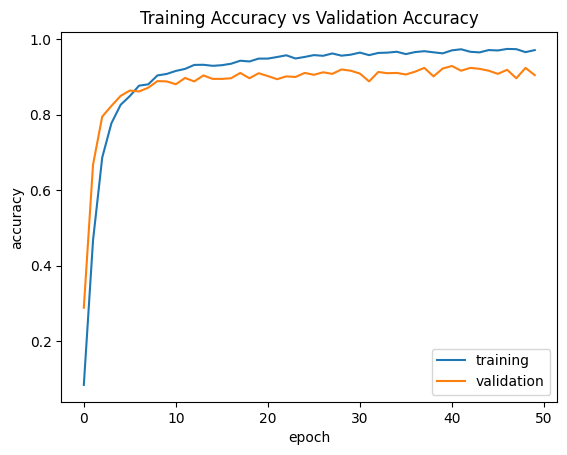

In [19]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

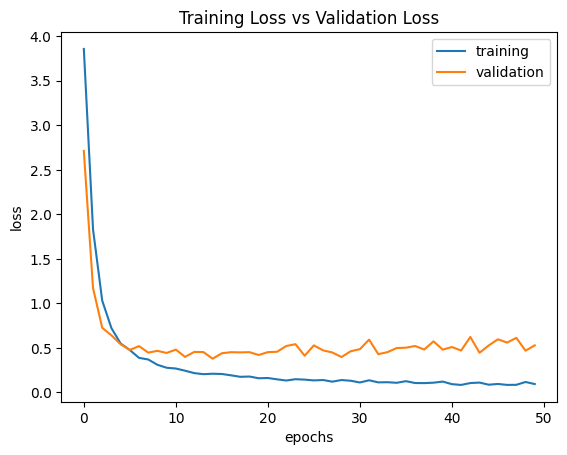

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()